In [22]:
import numpy as np
import matplotlib.pyplot as plt
from cluster_model import KMeans
from sklearn.datasets import make_blobs
from jupyterthemes import jtplot
jtplot.style(theme='onedork', grid=False, ticks=True)
np.random.seed(1024)

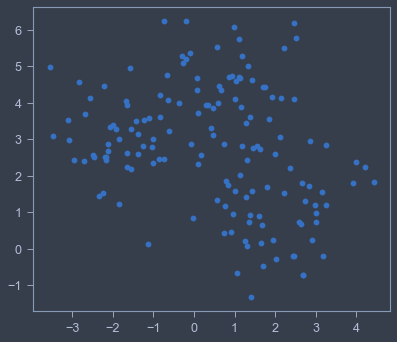

In [6]:
X, y, true_centers = make_blobs(n_samples=150, centers=3, n_features=2, random_state=0, return_centers=True)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [33]:
model = KMeans(classes=3)
results, means = model.fit(X, iters=20)

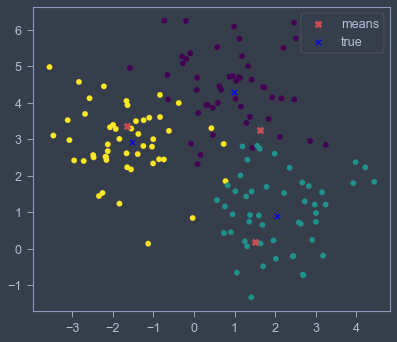

iters: 21


In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(means[:, 0], means[:, 1], marker='x', alpha=1., c='r', label='means', linewidths=3)
plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='x', alpha=1, c='blue', label='true')
plt.legend()
plt.show()
print(f'iters: {len(model.iter_means)}')

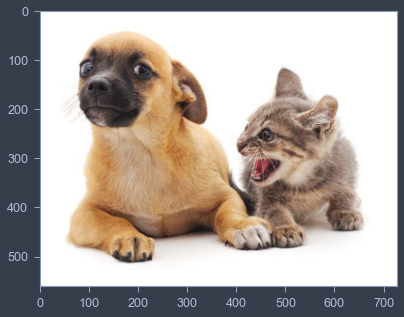

In [20]:
img = plt.imread('../data/catdog.jpg')
plt.imshow(img)
h, w = img.shape[:-1]
pixel = img.reshape(-1, 3) / 256

In [6]:
split_model = KMeans(classes=2)
results, centers = split_model.fit(pixel)

In [14]:
img_split = pixel
for k in range(len(centers)):
    img_split[results == k] = centers[k]
img_split = (img_split * 256).astype(int)

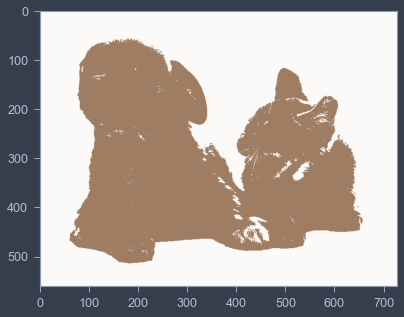

In [15]:
plt.imshow(img_split.reshape(h, w, -1))

In [2]:
from cluster_model import GaussianMixture

In [7]:
gm_model = GaussianMixture(3)
gm_model.fit(X)

In [8]:
classes = gm_model.result
gm_means = gm_model.means

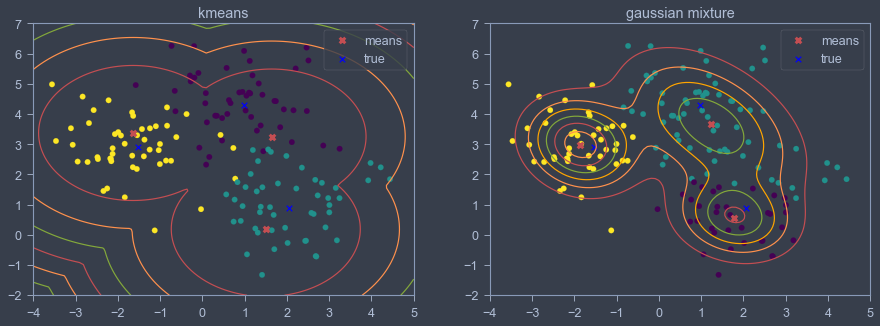

In [78]:
a, b = np.meshgrid(np.linspace(-4, 5, 100), np.linspace(-2, 7, 100))
meshgrid = np.concatenate([a.reshape(1, -1), b.reshape(1, -1)], axis=0).T
z1 = model.predict(meshgrid)
z2 = gm_model.predict_prob(meshgrid)

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('kmeans')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(means[:, 0], means[:, 1], marker='x', alpha=1., c='r', label='means', linewidths=3)
plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='x', alpha=1, c='blue', label='true')
plt.contour(a, b, model.dist(meshgrid, model.means).min(-1).reshape(100, -1), colors=('g', 'r', 'y'))
plt.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('gaussian mixture')
plt.scatter(X[:, 0], X[:, 1], c=classes)
plt.scatter(gm_means[:, 0], gm_means[:, 1], marker='x', alpha=1., c='r', label='means', linewidths=3)
plt.scatter(true_centers[:, 0], true_centers[:, 1], marker='x', alpha=1, c='blue', label='true')
plt.contour(a, b, gm_model._pdf(meshgrid).reshape(100, -1), colors=('g', 'r', 'y', 'orange'))
plt.legend()
plt.show()

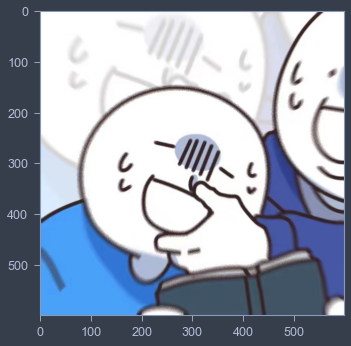

In [17]:
img = plt.imread('../data/2.jpg')
plt.imshow(img)
h, w = img.shape[:-1]
pixel = img.reshape(-1, 3) / 255

In [18]:
split_model = KMeans(classes=4)
results, centers = split_model.fit(pixel)
img_split = pixel
for k in range(len(centers)):
    img_split[results == k] = centers[k]
img_split = (img_split * 255).astype(int)

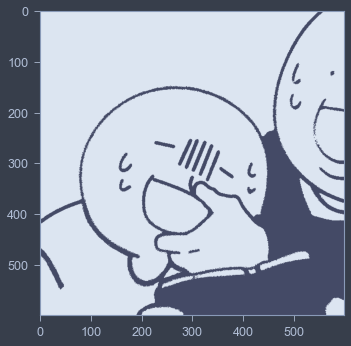

In [19]:
plt.imshow(img_split.reshape(h, w, -1))